#Import from drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Navigate to directory

In [ ]:
#minh hieu's dỉrectory
%cd /content/drive/My Drive/Colab\ Notebooks/Computer\ Vision/plate_test/plate_train_2K

In [ ]:
#nhu hieu's directory
%cd drive
%cd MyDrive
%cd BikePlate3K
%cd plate_train_2K

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/BikePlate3K/plate_train_2K
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/BikePlate3K/plate_train_2K
[Errno 2] No such file or directory: 'BikePlate3K'
/content/drive/MyDrive/BikePlate3K/plate_train_2K
[Errno 2] No such file or directory: 'plate_train_2K'
/content/drive/MyDrive/BikePlate3K/plate_train_2K


#Import library

In [ ]:
from matplotlib import pyplot as plt
import keras
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import math
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Input
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers import Reshape
from keras.layers.merge import add, concatenate
from keras.models import Model
import cv2
import matplotlib.image as mpimg


tf.enable_v2_behavior()

#Show an image or text

In [ ]:
with open('image_0002.txt') as f:
  r = f.read()
#print(r)
th_number = 2
t1_train = []
for i in range(4):
  outtrain = ''
  while(r[th_number] != ' '):
    outtrain = outtrain + r[th_number]
    th_number += 1
  outtrain = int(outtrain)
  th_number += 1
  t1_train.append(outtrain)
print(t1_train)
#t1_train[0] = (t1_train[0]+t1_train[2]/2)/40
#t1_train[1] = (t1_train[1]+t1_train[3]/2)/40
#t1_train[2] = t1_train[2]/240
#t1_train[3] = t1_train[3]/160
t1_train[2] += t1_train[0]
t1_train[3] += t1_train[1]
#print(t1_train)
print(t1_train)

[329, 352, 141, 107]
[329, 352, 470, 459]


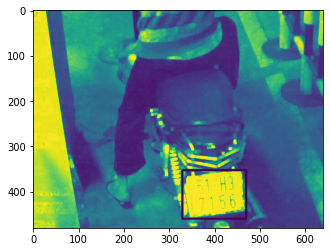

(480, 640)
<class 'numpy.ndarray'>


In [ ]:
img = mpimg.imread('image_0002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(gray,kernel,iterations = 1)
dilation = cv2.rectangle(dilation, (t1_train[0],t1_train[1]), (t1_train[2],t1_train[3]), (0, 255, 0), 3)
#dilation = dilation.reshape(480, 640, 1)
#canny = cv2.Canny(dilation, 120, 255, 1)
plt.imshow(dilation)
plt.show()
print(dilation.shape)
print(type(dilation))

#Load training and testing dataset, load validation data

In [ ]:
image_train = []
for i in range(1,2001):
  if i < 10 :
    img = mpimg.imread('image_000'+str(i)+'.jpg')
  elif i < 100 :
    img = mpimg.imread('image_00'+str(i)+'.jpg')
  elif i < 1000 :
    img = mpimg.imread('image_0'+str(i)+'.jpg')
  else :
    img = mpimg.imread('image_'+str(i)+'.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(gray,kernel,iterations = 1)
  dilation = dilation.reshape(480, 640, 1)
  image_train.append(dilation)
image_train = np.array(image_train)
print(image_train.shape)

(2000, 480, 640, 1)


In [ ]:
image_test = []
for i in range(1501,2001):
  if i < 10 :
    img = mpimg.imread('image_000'+str(i)+'.jpg')
  elif i < 100 :
    img = mpimg.imread('image_00'+str(i)+'.jpg')
  elif i < 1000 :
    img = mpimg.imread('image_0'+str(i)+'.jpg')
  else :
    img = mpimg.imread('image_'+str(i)+'.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(gray,kernel,iterations = 1)
  dilation = dilation.reshape(480, 640, 1)
  
  image_test.append(dilation)
image_test = np.array(image_test)
print(image_test.shape)

(500, 480, 640, 1)


In [ ]:
w_max = 0
h_max = 0
w_min = 1
h_min = 1
text_train = []
num_train = 2000
for j in range(1,num_train+1):
  t1_train = []
  if j < 10:
    with open('image_000'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 100:
    with open('image_00'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 1000:
    with open('image_0'+str(j)+'.txt') as f:
      r = f.read()
  else:
    with open('image_'+str(j)+'.txt') as f:
      r = f.read()
  th_number = 2
  for i in range(4):
    outtrain = ''
    while(r[th_number] != ' '):
      outtrain = outtrain + r[th_number]
      th_number += 1
    outtrain = int(outtrain)
    th_number += 1
    t1_train.append(outtrain)
  t1_train[0] = (t1_train[0]+t1_train[2]/2)/40
  t1_train[1] = (t1_train[1]+t1_train[3]/2)/40
  t1_train[2] = t1_train[2]/320
  t1_train[3] = t1_train[3]/240
  text_train.append(np.zeros((12,16,5)))
  for k in range(12):
    for l in range(16):
      for m in range(1,5):
        text_train[j-1][k][l][m] = 0.5
  if t1_train[2] > w_max:
    w_max = t1_train[2]
  if t1_train[2] < w_min:
    w_min = t1_train[2]
  if t1_train[3] > h_max:
    h_max = t1_train[3]
  if t1_train[3] < h_min:
    h_min = t1_train[3]
  if j == 15:
    print(t1_train)
  x_grid = math.floor(t1_train[0])
  y_grid = math.floor(t1_train[1])
  #print(x_grid)
  #print(y_grid)
  #print(t1_train)
  text_train[j-1][y_grid][x_grid][0] = 1
  text_train[j-1][y_grid][x_grid][1] = t1_train[0] - x_grid
  text_train[j-1][y_grid][x_grid][2] = t1_train[1] - y_grid
  text_train[j-1][y_grid][x_grid][3] = t1_train[2]
  text_train[j-1][y_grid][x_grid][4] = t1_train[3]
text_train = np.array(text_train)
#print(t1_train)
print(text_train.shape)
print(type(text_train))
print(text_train[1])
print(w_max)
print(h_max)
print(w_min)
print(h_min)

[12.7, 10.4125, 0.34375, 0.3458333333333333]
(2000, 12, 16, 5)
<class 'numpy.ndarray'>
[[[0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5

In [ ]:
text_test = []
begin = 1500
for j in range(begin+1,2001):
  text_test.append([])
  if j < 10:
    with open('image_000'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 100:
    with open('image_00'+str(j)+'.txt') as f:
      r = f.read()
  elif j < 1000:
    with open('image_0'+str(j)+'.txt') as f:
      r = f.read()
  else:
    with open('image_'+str(j)+'.txt') as f:
      r = f.read()
  th_number = 2
  for i in range(4):
    outtrain = ''
    while(r[th_number] != ' '):
      outtrain = outtrain + r[th_number]
      th_number += 1
    outtrain = int(outtrain)
    th_number += 1
    text_test[j-begin-1].append(outtrain)
  text_test[j-begin-1][2] += text_test[j-begin-1][0]
  text_test[j-begin-1][3] += text_test[j-begin-1][1]
print(t1_train)
text_test = np.array(text_test)
print(text_test.shape)
print(type(text_test))
print(text_test[499])

[11.75, 5.25, 0.4375, 0.44166666666666665]
(500, 4)
<class 'numpy.ndarray'>
[400 157 540 263]


In [ ]:
image_val = image_train[-100:]
text_val = text_train[-100:]
image_train = image_train[:-100]
text_train = text_train[:-100]
print(image_val.shape)
print(text_val.shape)
print(image_train.shape)
print(text_train.shape)

(100, 480, 640, 1)
(100, 12, 16, 5)
(1900, 480, 640, 1)
(1900, 12, 16, 5)


#Model Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(64, (7, 7), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform', input_shape=(480, 640, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (7, 7), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(192, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(1024, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(1024, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(Conv2D(1024, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding="same", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(1024, (3, 3), padding="valid", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (2, 3), padding="valid", activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1024, activation=LeakyReLU(), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(960, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Reshape((12, 16, 5), input_shape=(960,)))
#for layer in model.layers:
 #   print(layer.output_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 480, 640, 64)      3200      
_________________________________________________________________
batch_normalization_30 (Batc (None, 480, 640, 64)      256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 480, 640, 64)      200768    
_________________________________________________________________
batch_normalization_31 (Batc (None, 480, 640, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 240, 320, 64)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 120, 160, 64)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 120, 160, 192)    

#Compile and training

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss='mean_squared_error',
    metrics=None,
)

history = model.fit(
    image_train,
    text_train,
    batch_size=5,
    epochs=24,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(image_val, text_val),
)

Epoch 1/24
380/380 [==============================] - 378s 880ms/step - loss: 0.0444 - val_loss: 0.1604
Epoch 2/24
380/380 [==============================] - 333s 875ms/step - loss: 0.0071 - val_loss: 0.1263
Epoch 3/24
380/380 [==============================] - 333s 876ms/step - loss: 0.0054 - val_loss: 0.1048
Epoch 4/24
380/380 [==============================] - 333s 878ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 5/24
380/380 [==============================] - 333s 876ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 6/24
380/380 [==============================] - 333s 876ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/24
380/380 [==============================] - 333s 876ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/24
380/380 [==============================] - 333s 875ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/24
380/380 [==============================] - 333s 876ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/24
380/380 [==============================] - 333s 877m

In [ ]:
score = model.evaluate(image_val,text_val)
print(score)

4/4 [==============================] - 2s 526ms/step - loss: 7.9485e-04
0.000794848136138171


#Predict and testing

In [ ]:
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#number of test
numtest = 500
#use model to predict
predictions = model.predict(image_train[:numtest])
predict_x = []
predict_y = []
#print(predictions) 

#find the max probabilities
for i in range(numtest):
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(6):
    for k in range(8):
      if max < predictions[i][j][k][0]:
        max = predictions[i][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  check = text_train[i][predict_x[i]][predict_y[i]][0]
  if check == 1:
    grid_accuracy += 1
print(grid_accuracy)

0


In [ ]:
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#number of test
numtest = 20
#use model to predict
predictions = model.predict(image_test[:numtest])
predict_x = []
predict_y = []
#print(predictions) 

#find the max probabilities
for i in range(numtest):
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(12):
    for k in range(16):
      if max < predictions[i][j][k][0]:
        max = predictions[i][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  print("predict:")
  print(predictions[i][predict_x[i]][predict_y[i]])
  #print("truth:")
  #print(text_train[i][predict_x[i]][predict_y[i]])
  check = text_train[i][predict_x[i]][predict_y[i]][0]
  if check == 1:
    grid_accuracy += 1
#print(grid_accuracy)

predict:
[0.942759   0.45102683 0.5750488  0.4572577  0.44752154]
predict:
[0.99672395 0.5861452  0.5290743  0.4083625  0.41715124]
predict:
[0.991848   0.3281233  0.3831413  0.4044333  0.40309134]
predict:
[0.9701001  0.5334831  0.53887063 0.48204684 0.48229727]
predict:
[0.99154836 0.549916   0.49021223 0.4779265  0.4917032 ]
predict:
[0.14356965 0.564025   0.48397574 0.49628675 0.5094258 ]
predict:
[0.8247894  0.5673854  0.42559338 0.49146974 0.52047634]
predict:
[0.06320234 0.4934062  0.5090427  0.49596617 0.49531913]
predict:
[0.99559915 0.51493746 0.5184651  0.4789293  0.49025998]
predict:
[0.9812083  0.5034744  0.5189807  0.46630785 0.4416232 ]
predict:
[0.10289271 0.4928516  0.4820733  0.49454722 0.49039072]
predict:
[0.99961096 0.4354078  0.5698636  0.3684219  0.37392747]
predict:
[0.4604356  0.46140653 0.7462542  0.4436986  0.44900772]
predict:
[0.960625   0.2816237  0.44071415 0.4139358  0.4106098 ]
predict:
[0.9887766  0.45620176 0.70505    0.41004285 0.41373762]
predict:
[

In [ ]:
pred = model.predict(image_test[:1])
print(pred)

##IOU

In [ ]:
def maxi(a,b):
  if(a < b):
    return b
  else:
    return a
def mini(a,b):
  if(a < b):
    return a
  else:
    return b
def bb_iou(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = maxi(boxA[0], boxB[0])
	yA = maxi(boxA[1], boxB[1])
	xB = mini(boxA[2], boxB[2])
	yB = mini(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = (xB - xA) * (yB - yA)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
	boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
predict_box = []
predict_box.append(1)
predict_box.append(1)
predict_box.append(2)
predict_box.append(2)
real_box = [1,1,3,3]
iou = bb_iou(predict_box,real_box)
print(iou)

0.25


In [ ]:
# Generate predictions (probabilities = the output of the last layer)
# on new data using `predict`
#number of test
numtest = 500
#use model to predict
predictions = model.predict(image_test[:numtest])
predict_x = []
predict_y = []
predictions_box = []
truth_box = []
great_predict = 0 #iou>0.7
good_predict = 0 #iou>0.5
ok_predict = 0 #iou>0.3
#print(predictions) 

#find the max probabilities
for i in range(numtest):
  max = -0.1
  position_x = 0
  position_y = 0
  for j in range(12):
    for k in range(16):
      if max < predictions[i][j][k][0]:
        max = predictions[i][j][k][0]
        position_x = j
        position_y = k
  predict_x.append(position_x)
  predict_y.append(position_y)
#print(predict_result)
#print(y_test[:numtest])
grid_accuracy = 0
for i in range(len(predict_x)):
  #print("predict:")
  #print(predictions[i][predict_x[i]][predict_y[i]])
  #print("truth:")
  #print(text_test[i][predict_x[i]][predict_y[i]])
  predict_box = []
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*40 - predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*40 - predictions[i][predict_x[i]][predict_y[i]][4]*160)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][1]+predict_x[i])*40 + predictions[i][predict_x[i]][predict_y[i]][3]*120)
  predict_box.append((predictions[i][predict_x[i]][predict_y[i]][2]+predict_y[i])*40 + predictions[i][predict_x[i]][predict_y[i]][4]*160)
  #print(predict_box)
  predictions_box.append(predict_box)
  test_box = []
  test_box.append(text_test[i][1])
  test_box.append(text_test[i][0])
  test_box.append(text_test[i][3])
  test_box.append(text_test[i][2])
  #print(test_box)
  truth_box.append(test_box)
  #print(bb_iou(predict_box,test_box))
  if(bb_iou(predict_box,test_box) > 0.7):
    great_predict += 1
  if(bb_iou(predict_box,test_box) > 0.5):
    good_predict += 1
  if(bb_iou(predict_box,test_box) > 0.3):
    ok_predict += 1
print(great_predict)
print(good_predict)
print(ok_predict)

184
442
483


In [ ]:
True_positives = good_predict
False_positives = numtest - True_positives
False_negatives = False_positives
Precision = True_positives / (True_positives + False_positives)
Recall = True_positives / (True_positives + False_negatives)
F_1 = 2 * Precision * Recall / (Precision + Recall)
print(True_positives)
print(False_positives)
print(False_negatives)
print(Precision)
print(Recall)
print(F_1)

442
58
58
0.884
0.884
0.884


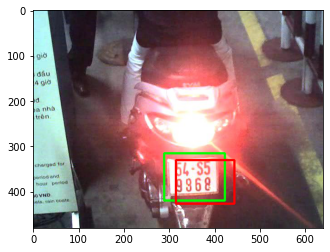

In [ ]:
current_img = 446
if current_img < 10 :
  img = mpimg.imread('image_150'+str(current_img + 1)+'.jpg')
elif current_img < 100 :
  img = mpimg.imread('image_15'+str(current_img + 1)+'.jpg')
else :
  img = mpimg.imread('image_1'+str(current_img + 501)+'.jpg')
# Start coordinate
# represents the top left corner of rectangle 
start_point_truth = (truth_box[current_img][1], truth_box[current_img][0]) 
start_point_predict = (round(predictions_box[current_img][1]), round(predictions_box[current_img][0]))
# Ending coordinate
# represents the bottom right corner of rectangle 
end_point_truth = (truth_box[current_img][3], truth_box[current_img][2]) 
end_point_predict = (round(predictions_box[current_img][3]), round(predictions_box[current_img][2]))
color_truth = (0, 255, 0) 
color_predict = (255, 0, 0) 
# Line thickness of 1 px 
thickness = 3
img = cv2.rectangle(img, start_point_truth, end_point_truth, color_truth, thickness)
img = cv2.rectangle(img, start_point_predict, end_point_predict, color_predict, thickness)
plt.imshow(img)
plt.show()

#Save model

In [ ]:
model.save("yolo_license_plate_model_4(12x16)")

#Testing random code

In [ ]:
current_img = 49
if current_img < 10 :
  img = mpimg.imread('image_150'+str(current_img + 1)+'.jpg')
elif current_img < 100 :
  img = mpimg.imread('image_15'+str(current_img + 1)+'.jpg')
else :
  img = mpimg.imread('image_1'+str(current_img + 501)+'.jpg')
# Start coordinate
# represents the top left corner of rectangle 
start_point_truth = (412, 200) 
start_point_predict = (round(predictions_box[current_img][1]), round(predictions_box[current_img][0]))
# Ending coordinate
# represents the bottom right corner of rectangle 
end_point_truth = (555, 315) 
end_point_predict = (round(predictions_box[current_img][3]), round(predictions_box[current_img][2]))
color_truth = (0, 255, 0) 
color_predict = (255, 0, 0) 
# Line thickness of 1 px 
thickness = 3
img = cv2.rectangle(img, start_point_truth, end_point_truth, color_truth, thickness)
img = cv2.rectangle(img, start_point_predict, end_point_predict, color_predict, thickness)
plt.imshow(img)
plt.show()
print(img.shape)

In [ ]:
print(round(4.66))

5


In [ ]:
print(image_test[0].shape)

(480, 640, 3)


In [ ]:
print(text_train[10])

[[[0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]]

 [[0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]
  [0.         0.5        0.5        0.5        0.5       ]]

 [[0.         0.5        0.5        0.5        0.5  

In [ ]:
pre = []
pre.append([1,2])
pre.append(2)
pre.append(2)
print(len(pre[0]))

2


In [ ]:
m = 0.29375
n = 0.1328125
print(0.29375*640)
print(0.1328125*640)
print(0.31875*480)
print(0.13333333333333333*480)

188.0
85.0
153.0
64.0


#Plot model

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)